# Deep Neural Network (DNN)

- The dataset has two features('feature1' and 'feature2') and one target variable
- The target variable(named as 'class') maps each record to either 0 or 1
- We'll first check if data is Linearly separable or not
- We'll then check the performance of Logistic Regression
- We'll be building a deep neural network using tensorflow for binary classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [4]:
##Read Data
data = pd.read_csv('data/blobs.csv')
data.head()


,Unnamed: 0,feature1,feature2,class
0,0,4.264632,-2.679361,1.0
1,1,-2.073791,-10.059099,1.0
2,2,-1.893893,4.504847,0.0
3,3,-0.529888,-3.059588,0.0
4,4,-2.958982,-0.156887,0.0


The following code extacts features and target variable and assign it to variable X and y respectively

In [5]:
X = data[['feature1', 'feature2']].values
y = data['class'].values

- Visualize the data in x-y plane. The green and blue dots corresponds to class 0 and 1 respectively
- It can be seen that the data is not linearly seperable i.e you cannot draw one specific boundary to classify the data.

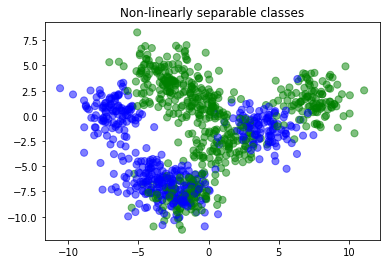

In [6]:
colors=['green','blue']
cmap = matplotlib.colors.ListedColormap(colors)
#Plot the figure
plt.figure()
plt.title('Non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=y,
           marker= 'o', s=50,cmap=cmap,alpha = 0.5 )
plt.show()

Before diving into deep neural network lets try to classify the data using simple logistic regression.    


## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
_ = lr_model.fit(X, y)

In [1]:
#Function to plot Decision boundary

def plot_decision_boundary( X, y, model):
    plt.clf()
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1   
    colors=['blue','green']
    cmap = matplotlib.colors.ListedColormap(colors)   
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    A = model(np.c_[xx.ravel(), yy.ravel()])
    A = A.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, A, cmap="spring")
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, s=8,cmap=cmap)
    plt.title("Decision Boundary for learning rate:")
    plt.show()

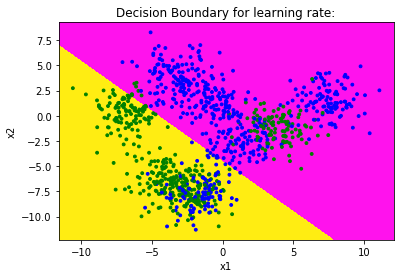

In [9]:
#Plotting Decision Boundary
plot_decision_boundary(X.T,y,lambda x: lr_model.predict(x))

- From the above plot you can say that simple logistic regression poorly perfroms in classifying the data since the decision boundary is not able to effectively classify the two classes.

## Deep Neural Network

In [32]:
##Transpose X so that rows represents the features and column represents samples
X_data = X.T

# Reshape data y to a row vector whose length equal to number of samples
y_data = y.T.reshape(1, len(y))
##End code

In [33]:
y_data.shape

(1, 1000)

Define the layer dimension as an array  called **'layer_dims'**  with one input layer **equal to number of features**, **two hidden layer** with **nine nodes** each and **one final output layer** with** one node**.


In [23]:
layer_dims = [X_data.shape[0], 9, 9, 1]

layer_dims

[2, 9, 9, 1]

In [15]:
## Import tensorflow package as tf
import tensorflow as tf

In [16]:
# Defining Placeholder

def placeholders(num_features):
    A_0 = tf.placeholder(dtype = tf.float64, shape = ([num_features,None]))
    Y = tf.placeholder(dtype = tf.float64, shape = ([1,None]))
    return A_0,Y

In [17]:
# Function to initialize weights and bias for each layer
def initialize_parameters_deep(layer_dims):
    L = len(layer_dims)
    parameters = {}
    for l in range(1,L):
        parameters['W' + str(l)] = tf.Variable(initial_value=tf.random_normal([layer_dims[l], layer_dims[l-1]], dtype=tf.float64)* 0.01)
        parameters['b' + str(l)]=tf.Variable(initial_value=tf.zeros([layer_dims[l],1],dtype=tf.float64) * 0.01)
    return parameters 

In [18]:
# Functon to define forward propagation for a given layer

def linear_forward_prop(A_prev,W,b,activation):
    Z = tf.add(tf.matmul(W, A_prev), b)
    if activation == "sigmoid":
        A = Z
    elif activation == "relu":
        A = tf.nn.relu(Z)
    return A

In [19]:
# Forward propagation for entire network

def l_layer_forwardProp(A_0, parameters):
    A = A_0
    L = len(parameters)//2
    for l in range(1,L):
        A_prev = A
        A = linear_forward_prop(A_prev,parameters['W' + str(l)],parameters['b' + str(l)], "relu")
    A_final = linear_forward_prop(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid" )
    return A_final

In [20]:
# Define the model, returns: parameters ( dictionary of updated weights and bias)

def deep_layer_network(X_data,y_data, layer_dims, learning_rate, num_iter):
    num_features = layer_dims[0]
    A_0, Y = placeholders(num_features)                           #call placeholder function to initialize placeholders A_0 and Y
    parameters =  initialize_parameters_deep(layer_dims)           #Initialse Weights and bias using initialize_parameters_deep() with layer_dims as parameters  
    Z_final =  l_layer_forwardProp(A_0, parameters)                                      #call the function l_layer_forwardProp() to define the final output
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z_final,labels=Y))     #define the mean cost using sigmoid cross entropy function
    train_net = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)     #call tensorflow's gradient descent optimizer function with minimize cost  
    init = tf.global_variables_initializer()    
  
    with tf.Session() as sess:
        sess.run(init)
        for i in range(num_iter):
        _,c = sess.run([train_net, cost], feed_dict={A_0: X_data, Y: y_data})
        if i % 1000 == 0:
            print(c)
            
        
        params = sess.run(parameters)
    return params

In [34]:
# Train the deep neural network with learning rate 0.3 and number of iterations to 10000
parameters = deep_layer_network(X_data, y_data, layer_dims, .3, 10000 )    #fill the parameters 

0.6931483032398527
0.399406620516301
0.30384235315413605
0.2885066435633564
0.28677315855660696
0.2852056340426826
0.28324016749702025
0.2811183530981241
0.28288219157842376
0.2834594465278399


Run the cell below to define the method to predict outputof the model for given input and parameters.The code has been written for you

In [35]:
def predict(A_0, parameters):
    with tf.Session() as sess:
        Z = l_layer_forwardProp(A_0, parameters)
        A = sess.run(tf.round(tf.sigmoid(Z)))
    return A

Run the below cell to plot the decision boundary predicted by the deep nural network

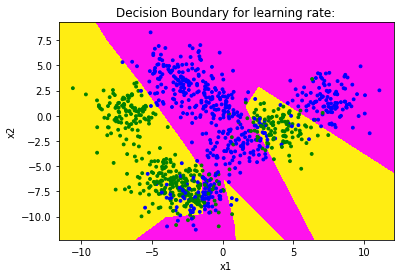

In [36]:
plot_decision_boundary(X_data,y,lambda x: predict(x.T,parameters))